In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import cv2
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing, metrics, svm
from threading import Thread
from skimage.filters import gaussian as gsn
from sklearn.decomposition import PCA

In [2]:
DIRECTORY = r'C:\Users\RONI\Desktop\Python_Project\train'
IMG_SIZE = 50
PRECENTAGE = 0.98

In [3]:
x = []
y = []

for img_name in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img_name)
    x.append(cv2.imread(img_path))
    y.append(img_name.split('.')[0])
y = np.array(y)

In [4]:
print(len(x))
print(len(y))

25000
25000


In [5]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

In [6]:
img_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.1, random_state=42, shuffle=True,
                                                      stratify=y_encoded)

In [7]:
final_img_train = []
for img in img_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian = gsn(gray_img, sigma = 1, mode = 'constant', cval=0.0)
    img_arr = cv2.resize(gaussian, (IMG_SIZE, IMG_SIZE))
    trans_img = preprocessing.normalize(img_arr)
    final_img_train.append(trans_img)

final_img_train = np.array(final_img_train)

In [8]:
final_img_train[0].shape

(50, 50)

0


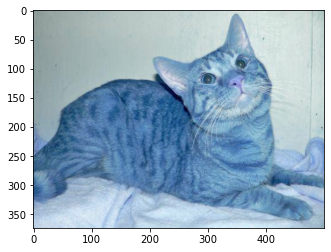

In [9]:
print(y_train[0])
plt.imshow(img_train[0])

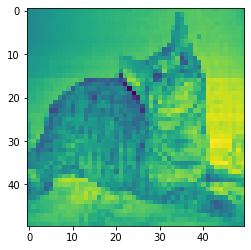

In [10]:
plt.imshow(final_img_train[0])

In [11]:
final_img_train = final_img_train.reshape(22500, IMG_SIZE*IMG_SIZE)
x_train = pd.DataFrame(final_img_train)
x_train

0         1         2         3         4         5         6     \
0      0.106638  0.108749  0.113505  0.114775  0.115793  0.118460  0.121019   
1      0.088366  0.094387  0.095270  0.099420  0.101761  0.103426  0.067270   
2      0.129274  0.142197  0.136771  0.124724  0.142214  0.153285  0.153907   
3      0.143217  0.150735  0.157942  0.171608  0.174393  0.177800  0.185212   
4      0.035196  0.052198  0.046542  0.016984  0.017214  0.018969  0.019613   
...         ...       ...       ...       ...       ...       ...       ...   
22495  0.038203  0.037495  0.121211  0.159887  0.160117  0.127945  0.182268   
22496  0.149056  0.147515  0.147873  0.146964  0.147750  0.150187  0.150227   
22497  0.070920  0.069889  0.066974  0.067042  0.068774  0.067649  0.070872   
22498  0.103727  0.110140  0.116000  0.123431  0.124928  0.128364  0.133976   
22499  0.100121  0.109955  0.098446  0.081416  0.078684  0.118775  0.143795   

           7         8         9     ...      2490      2491      2492  \
0      0.121978  0.124450  0.125968  ...  0.149040  0.146806  0.145914   
1      0.180645  0.132834  0.131095  ...  0.129074  0.119066  0.125001   
2      0.160255  0.140934  0.137672  ...  0.128890  0.158780  0.184191   
3      0.190914  0.194817  0.198644  ...  0.175568  0.152793  0.158604   
4      0.007076  0.017215  0.050903  ...  0.160146  0.162026  0.159828   
...         ...       ...       ...  ...       ...       ...       ...   
22495  0.100244  0.174102  0.068728  ...  0.112375  0.178102  0.280595   
22496  0.151216  0.152425  0.150688  ...  0.159857  0.143922  0.198995   
22497  0.066065  0.071123  0.073571  ...  0.123738  0.123084  0.123353   
22498  0.138266  0.139769  0.137225  ...  0.166089  0.149343  0.045541   
22499  0.148437  0.150937  0.148096  ...  0.164451  0.175138  0.139564   

           2493      2494      2495      2496      2497      2498      2499  
0      0.144426  0.136754  0.133540  0.124913  0.122100  0.122359  0.114978  
1      0.113195  0.122784  0.135737  0.139288  0.140117  0.136050  0.158764  
2      0.081500  0.119345  0.162172  0.082606  0.126682  0.146403  0.131690  
3      0.163048  0.157825  0.139640  0.122423  0.125118  0.117993  0.107719  
4      0.146397  0.157515  0.156635  0.156278  0.154170  0.152784  0.151761  
...         ...       ...       ...       ...       ...       ...       ...  
22495  0.184913  0.027294  0.068745  0.304453  0.327784  0.266768  0.048758  
22496  0.162449  0.066966  0.104321  0.191305  0.142243  0.158040  0.145912  
22497  0.132179  0.143326  0.142583  0.142317  0.139485  0.139241  0.137278  
22498  0.084677  0.126957  0.167490  0.172850  0.107461  0.016602  0.097861  
22499  0.145047  0.170051  0.131555  0.155206  0.119812  0.142855  0.134775  

[22500 rows x 2500 columns]

# building models

In [12]:
def trainModel(mdl, model_name, x_t, y_t, pred_l):
    m_predict = cross_val_predict(mdl,x_t,y_t)
    print(model_name + ": " + str(metrics.accuracy_score(y_t, m_predict)))
    pred_l.append(m_predict)

In [13]:
model1 = GaussianNB()
model2 = RandomForestClassifier(n_estimators=100)
model3 = KNeighborsClassifier(n_neighbors=3)
ada_GNB = AdaBoost(base_estimator=model1, learning_rate=1, algorithm='SAMME', random_state=42)
model4 = VotingClassifier(estimators=[('mdl1', ada_GNB), ('mdl2', model2) , ('mdl3',model3)], voting='hard')


In [14]:
mdl_dict = {"GaussianNB":model1, "RandomForestClassifier": model2, "KNeighborsClassifier":model3, "Full VC":model4
            , "ada_GNB":ada_GNB}
modelsThreads = []
pred_lst = []
for m_name, m in mdl_dict.items():
    t = Thread(target=trainModel, args=(m, m_name ,x_train, y_train, pred_lst))
    t.start()
    t.join()
    modelsThreads.append(t)

GaussianNB: 0.5683555555555555
RandomForestClassifier: 0.6293777777777778
KNeighborsClassifier: 0.5428
Full VC: 0.6236
ada_GNB: 0.5962222222222222


In [15]:
cm = confusion_matrix(y_train, pred_lst[len(pred_lst)-1])
cm_df = pd.DataFrame(cm,
                     index = ['cat', 'dog'], 
                     columns = ['cat', 'dog'])
cm

array([[6021, 5229],
       [3856, 7394]], dtype=int64)

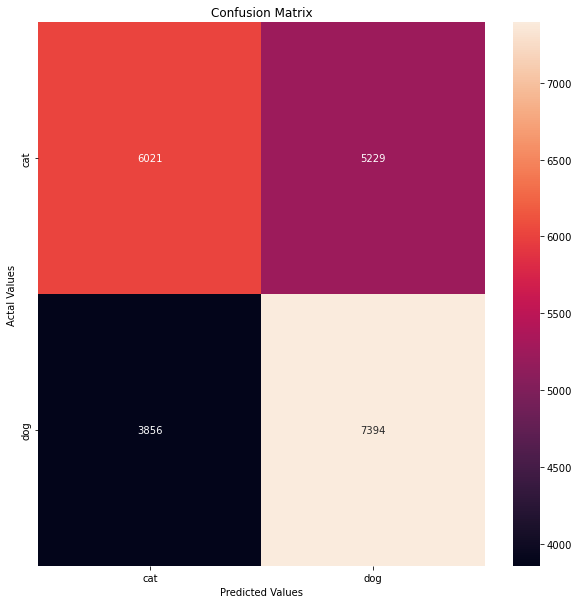

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [21]:
final_x_test = []
for img in x_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian = gsn(gray_img, sigma = 1, mode = 'constant', cval=0.0)
    img_arr = cv2.resize(gaussian, (IMG_SIZE, IMG_SIZE))
    trans_img = preprocessing.normalize(img_arr)
    final_x_test.append(trans_img)
final_x_test = np.array(final_x_test)
final_x_test = final_x_test.reshape(2500, IMG_SIZE*IMG_SIZE)

In [22]:
model = model2.fit(x_train, y_train)
final_pred = model.predict(final_x_test)
print(metrics.accuracy_score(y_test, final_pred))

0.6316
